In [1]:
# Import libraries 

import pandas as pd 
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib

In [2]:
# Identify path 

os.getcwd()

'C:\\Users\\Megan\\Documents\\Analytics\\Gun Violence Achievement 6\\03 Scripts'

In [3]:
os.getcwd()[-10:]

'03 Scripts'

In [4]:
# Create path 
path = os.getcwd()[:-10]

In [5]:
# Import merged dataframe 

df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','guns_census_merge.csv'), index_col=False)

In [6]:
df.head()

,Unnamed: 0,State,#_killed,#_injured,latitude,longitude,n_guns_involved,Geographic_Region,Year,Month,Day,State_Year,Total Population
0,0,Pennsylvania,0.0,4.0,40.3467,-79.8559,1.0,East,2013,1.0,1.0,"Pennsylvania, 2013",12583354
1,1,Pennsylvania,1.0,3.0,39.9924,-75.1300,1.0,East,2013,4.0,9.0,"Pennsylvania, 2013",12583354
2,2,Pennsylvania,1.0,3.0,39.8564,-75.3587,2.0,East,2013,4.0,28.0,"Pennsylvania, 2013",12583354
3,3,Pennsylvania,0.0,4.0,40.3091,-78.9124,1.0,East,2013,5.0,6.0,"Pennsylvania, 2013",12583354
4,4,Pennsylvania,0.0,4.0,40.0505,-75.1554,1.0,East,2013,5.0,11.0,"Pennsylvania, 2013",12583354


In [7]:
df.columns

Index(['Unnamed: 0', 'State', '#_killed', '#_injured', 'latitude', 'longitude',
       'n_guns_involved', 'Geographic_Region', 'Year', 'Month', 'Day',
       'State_Year', ' Total Population '],
      dtype='object')

In [8]:
df.rename(columns = {' Total Population ':'State Population'}, inplace=True)

In [9]:
df.head()

,Unnamed: 0,State,#_killed,#_injured,latitude,longitude,n_guns_involved,Geographic_Region,Year,Month,Day,State_Year,State Population
0,0,Pennsylvania,0.0,4.0,40.3467,-79.8559,1.0,East,2013,1.0,1.0,"Pennsylvania, 2013",12583354
1,1,Pennsylvania,1.0,3.0,39.9924,-75.1300,1.0,East,2013,4.0,9.0,"Pennsylvania, 2013",12583354
2,2,Pennsylvania,1.0,3.0,39.8564,-75.3587,2.0,East,2013,4.0,28.0,"Pennsylvania, 2013",12583354
3,3,Pennsylvania,0.0,4.0,40.3091,-78.9124,1.0,East,2013,5.0,6.0,"Pennsylvania, 2013",12583354
4,4,Pennsylvania,0.0,4.0,40.0505,-75.1554,1.0,East,2013,5.0,11.0,"Pennsylvania, 2013",12583354


In [10]:
# Remove unnamed column 

df = df.drop(columns = 'Unnamed: 0')

In [11]:
# Create column to scale down total population 

df['Population_millions'] = df['State Population']/1000000


In [12]:
df.head()

,State,#_killed,#_injured,latitude,longitude,n_guns_involved,Geographic_Region,Year,Month,Day,State_Year,State Population,Population_millions
0,Pennsylvania,0.0,4.0,40.3467,-79.8559,1.0,East,2013,1.0,1.0,"Pennsylvania, 2013",12583354,12.583354
1,Pennsylvania,1.0,3.0,39.9924,-75.1300,1.0,East,2013,4.0,9.0,"Pennsylvania, 2013",12583354,12.583354
2,Pennsylvania,1.0,3.0,39.8564,-75.3587,2.0,East,2013,4.0,28.0,"Pennsylvania, 2013",12583354,12.583354
3,Pennsylvania,0.0,4.0,40.3091,-78.9124,1.0,East,2013,5.0,6.0,"Pennsylvania, 2013",12583354,12.583354
4,Pennsylvania,0.0,4.0,40.0505,-75.1554,1.0,East,2013,5.0,11.0,"Pennsylvania, 2013",12583354,12.583354


In [13]:
# Create column to combine total numbers of killed and injured 

df['Total Victims'] = df['#_killed'] + df['#_injured']

In [14]:
df.head()

,State,#_killed,#_injured,latitude,longitude,n_guns_involved,Geographic_Region,Year,Month,Day,State_Year,State Population,Population_millions,Total Victims
0,Pennsylvania,0.0,4.0,40.3467,-79.8559,1.0,East,2013,1.0,1.0,"Pennsylvania, 2013",12583354,12.583354,4.0
1,Pennsylvania,1.0,3.0,39.9924,-75.1300,1.0,East,2013,4.0,9.0,"Pennsylvania, 2013",12583354,12.583354,4.0
2,Pennsylvania,1.0,3.0,39.8564,-75.3587,2.0,East,2013,4.0,28.0,"Pennsylvania, 2013",12583354,12.583354,4.0
3,Pennsylvania,0.0,4.0,40.3091,-78.9124,1.0,East,2013,5.0,6.0,"Pennsylvania, 2013",12583354,12.583354,4.0
4,Pennsylvania,0.0,4.0,40.0505,-75.1554,1.0,East,2013,5.0,11.0,"Pennsylvania, 2013",12583354,12.583354,4.0


In [15]:
Total_Hurt = df.groupby('State').agg({'Total Victims' : ['sum']})

In [16]:
State_Pop = df.groupby('State').agg({'State Population' : ['mean']})

In [17]:
State_Pop.head()

,State Population
,mean
State,
Alabama,4.516974e+06
Alaska,6.846409e+05
Arizona,6.580022e+06
Arkansas,2.700741e+06
California,3.837395e+07


In [18]:
State_Pop = State_Pop['State Population'] / 1 

In [19]:
Total_Hurt.head()

,Total Victims
,sum
State,
Alabama,4443.0
Alaska,536.0
Arizona,1977.0
Arkansas,1916.0
California,12226.0


In [20]:
# Divide sum of total victims by number of years represented in data frame

Total_Hurt = Total_Hurt['Total Victims'] / 5

In [21]:
Total_Hurt

,sum
State,
Alabama,888.6
Alaska,107.2
Arizona,395.4
Arkansas,383.2
California,2445.2
Colorado,340.2
Connecticut,295.6
Delaware,202.8
District of Columbia,348.8


In [22]:
# Merge subsets to create smaller data set 

Death_Rate = Total_Hurt.merge(State_Pop, on = 'State')

In [23]:
Death_Rate = Death_Rate.reset_index()

In [24]:
Death_Rate.head()

,State,sum,mean
0,Alabama,888.6,4.516974e+06
1,Alaska,107.2,6.846409e+05
2,Arizona,395.4,6.580022e+06
3,Arkansas,383.2,2.700741e+06
4,California,2445.2,3.837395e+07


In [25]:
Death_Rate.rename(columns = {'sum' : 'Victims_per_Year'}, inplace=True)
Death_Rate.rename(columns = {'mean' : 'State_Population'}, inplace=True)

In [26]:
Death_Rate.head()

,State,Victims_per_Year,State_Population
0,Alabama,888.6,4.516974e+06
1,Alaska,107.2,6.846409e+05
2,Arizona,395.4,6.580022e+06
3,Arkansas,383.2,2.700741e+06
4,California,2445.2,3.837395e+07


In [27]:
Death_Rate['Victims_per_100000'] = (Death_Rate['Victims_per_Year'] / Death_Rate['State_Population']) * 100000

In [28]:
Death_Rate.head()

,State,Victims_per_Year,State_Population,Victims_per_100000
0,Alabama,888.6,4.516974e+06,19.672460
1,Alaska,107.2,6.846409e+05,15.657844
2,Arizona,395.4,6.580022e+06,6.009098
3,Arkansas,383.2,2.700741e+06,14.188700
4,California,2445.2,3.837395e+07,6.372032


In [29]:
Death_Rate = Death_Rate.sort_values(by="Victims_per_100000", ascending=False).reset_index().copy()
Death_Rate.head()

,index,State,Victims_per_Year,State_Population,Victims_per_100000
0,8,District of Columbia,348.8,6.549349e+05,53.257200
1,18,Louisiana,1185.4,4.415626e+06,26.845573
2,13,Illinois,3120.2,1.254179e+07,24.878434
3,7,Delaware,202.8,9.293578e+05,21.821521
4,24,Mississippi,548.4,2.612983e+06,20.987509


In [30]:
# Export Data subset 

Death_Rate.to_csv(os.path.join(path, '02 Data','Prepared Data','Deaths_pop_subset.csv'))

In [31]:
Mortality = df.merge(Death_Rate, on = ['State'], how = 'right')

In [32]:
Mortality.head()

,State,#_killed,#_injured,latitude,longitude,n_guns_involved,Geographic_Region,Year,Month,Day,State_Year,State Population,Population_millions,Total Victims,index,Victims_per_Year,State_Population,Victims_per_100000
0,District of Columbia,0.0,5.0,38.8978,-76.9717,1.0,East,2013,1.0,26.0,"District of Columbia, 2013",617513,0.617513,5.0,8,348.8,654934.916892,53.2572
1,District of Columbia,0.0,13.0,38.9062,-77.0099,4.0,East,2013,3.0,11.0,"District of Columbia, 2013",617513,0.617513,13.0,8,348.8,654934.916892,53.2572
2,District of Columbia,0.0,4.0,38.8583,-76.9883,1.0,East,2013,7.0,13.0,"District of Columbia, 2013",617513,0.617513,4.0,8,348.8,654934.916892,53.2572
3,District of Columbia,1.0,3.0,38.9047,-77.0122,1.0,East,2013,9.0,12.0,"District of Columbia, 2013",617513,0.617513,4.0,8,348.8,654934.916892,53.2572
4,District of Columbia,11.0,3.0,38.8730,-76.9977,2.0,East,2013,9.0,16.0,"District of Columbia, 2013",617513,0.617513,14.0,8,348.8,654934.916892,53.2572


In [33]:
df.shape

(218661, 14)

In [34]:
Mortality.shape

(218661, 18)

In [35]:
# Drop unnecessary columns 

Mortality = Mortality.drop(columns = ['index','Victims_per_Year','State_Population'])

In [36]:
Mortality.head()

,State,#_killed,#_injured,latitude,longitude,n_guns_involved,Geographic_Region,Year,Month,Day,State_Year,State Population,Population_millions,Total Victims,Victims_per_100000
0,District of Columbia,0.0,5.0,38.8978,-76.9717,1.0,East,2013,1.0,26.0,"District of Columbia, 2013",617513,0.617513,5.0,53.2572
1,District of Columbia,0.0,13.0,38.9062,-77.0099,4.0,East,2013,3.0,11.0,"District of Columbia, 2013",617513,0.617513,13.0,53.2572
2,District of Columbia,0.0,4.0,38.8583,-76.9883,1.0,East,2013,7.0,13.0,"District of Columbia, 2013",617513,0.617513,4.0,53.2572
3,District of Columbia,1.0,3.0,38.9047,-77.0122,1.0,East,2013,9.0,12.0,"District of Columbia, 2013",617513,0.617513,4.0,53.2572
4,District of Columbia,11.0,3.0,38.8730,-76.9977,2.0,East,2013,9.0,16.0,"District of Columbia, 2013",617513,0.617513,14.0,53.2572


In [37]:
# Create subset for correlation analysis 

new = Mortality[['#_killed','#_injured','n_guns_involved','Population_millions','Total Victims','Victims_per_100000']]

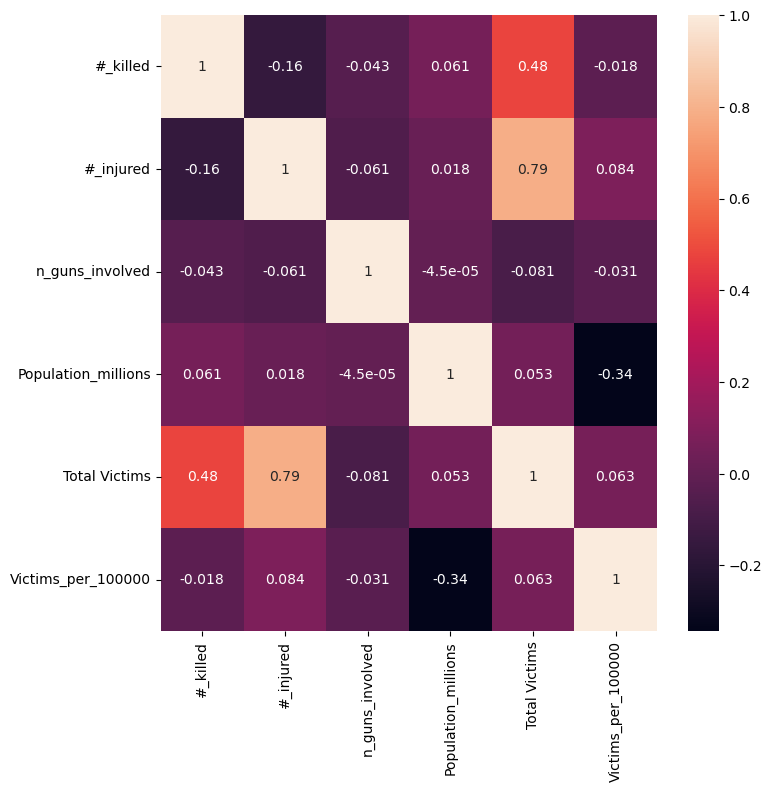

In [38]:
# Create a subplot with matplotlib 
f,ax = plt.subplots(figsize=(8,8)) 

# Create correlation heatmap 
corr = sns.heatmap(new.corr(), annot = True, ax = ax)

#### There are no significant correlations

### Create scatterplots to look at relationships between variables 

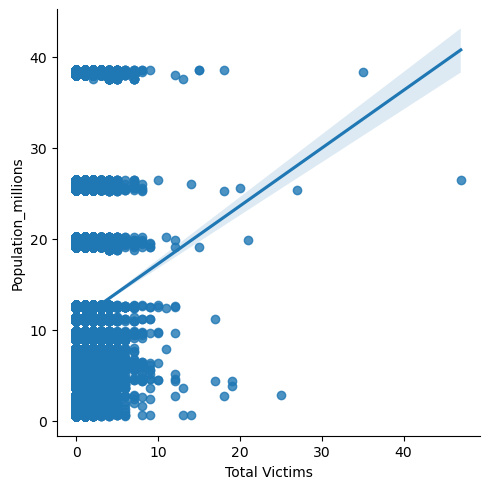

In [39]:
sns.lmplot(x = 'Total Victims', y = 'Population_millions', data = new)
plt.show()

#### This scatterplot shows that the higher the population of a state, the more people that are killed and injured by gun violence

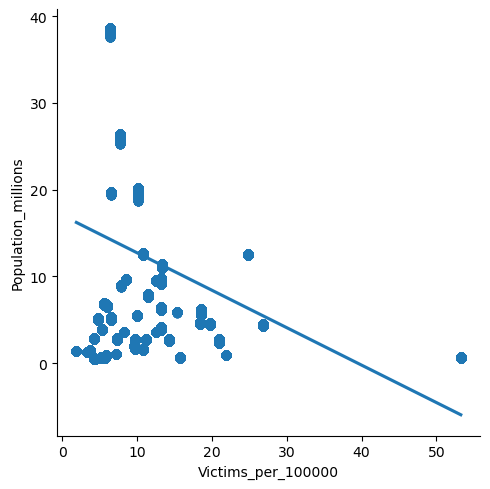

In [40]:
sns.lmplot(x = 'Victims_per_100000', y = 'Population_millions', data = new)
plt.show()

#### This scatterplot shows that there a negative relationship between Population in Millions and Victims per 100000 people. This chart would suggest that as a state's population decreases, it's rate of those injured and killed (Victims) by gun violence increases.

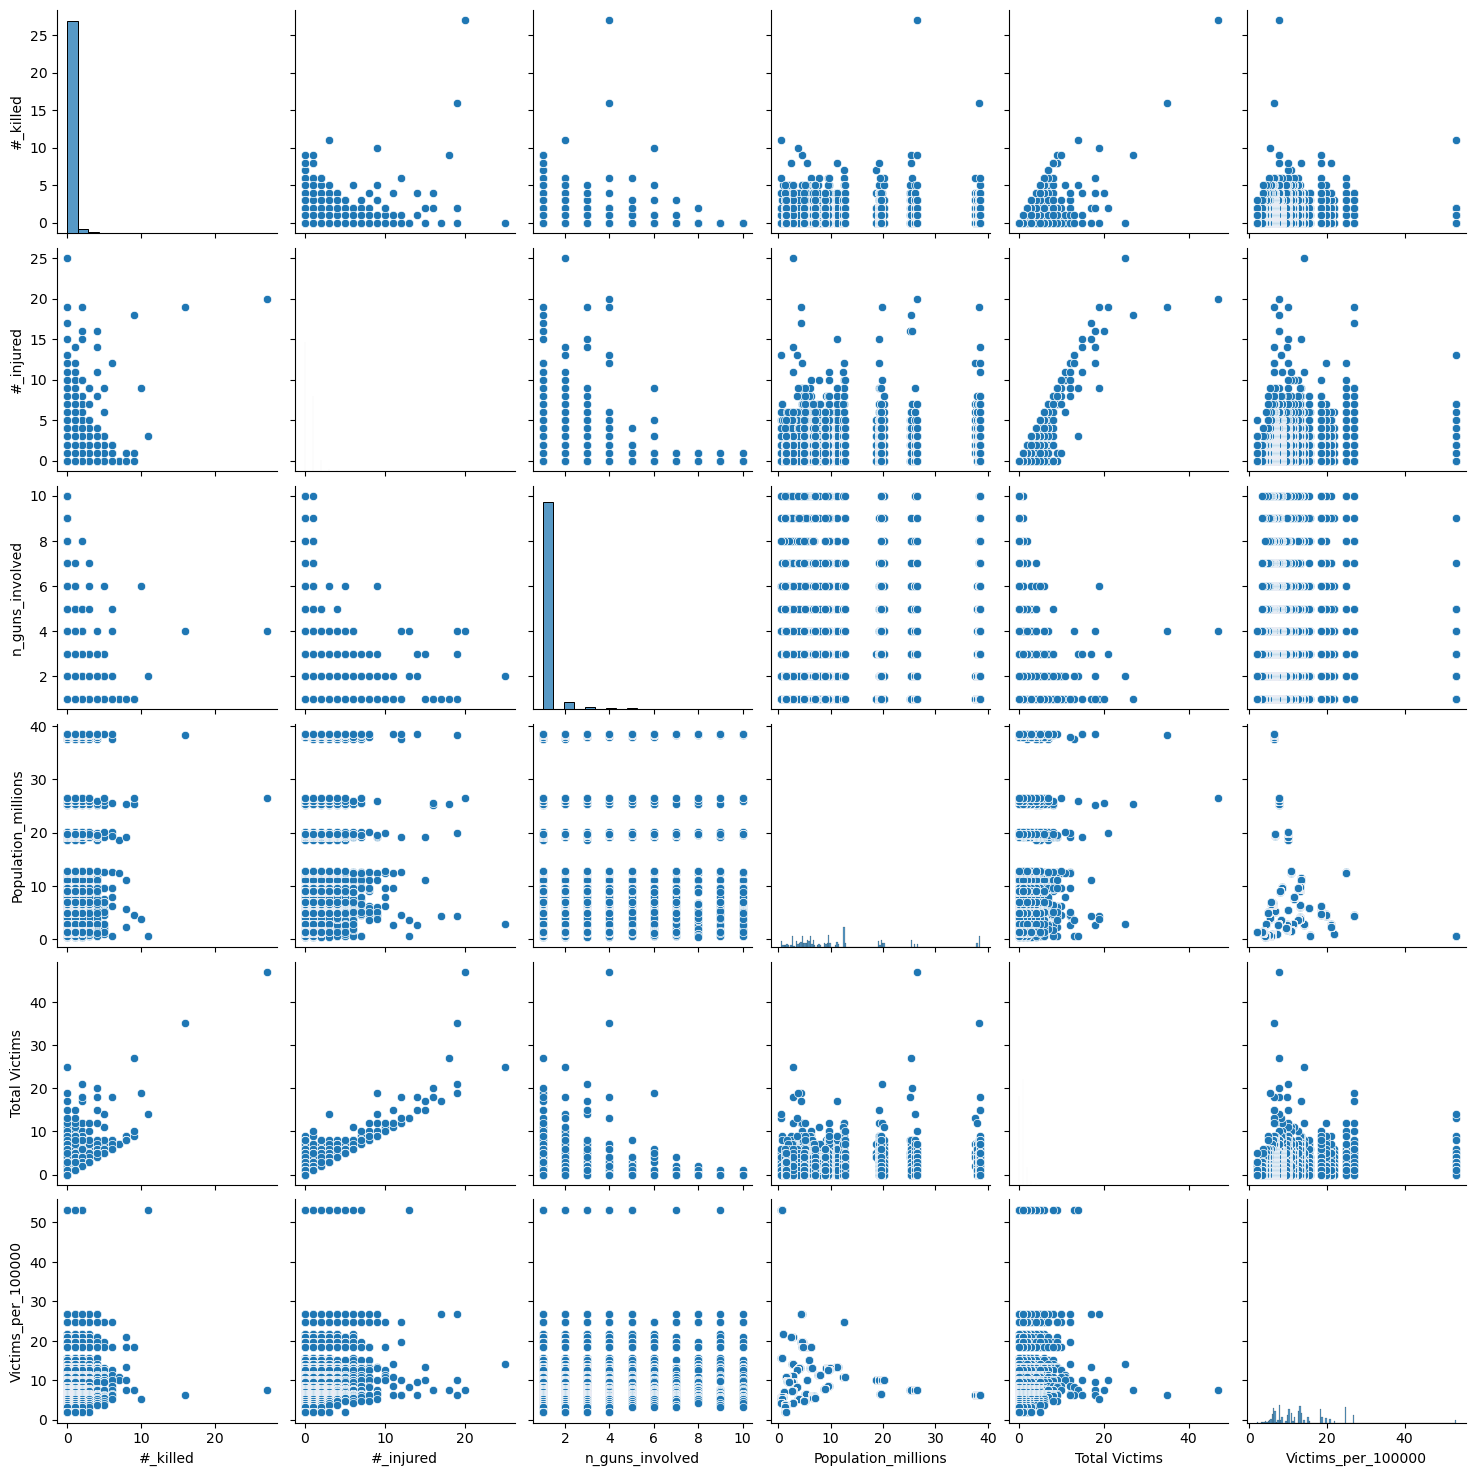

In [41]:
b = sns.pairplot(new)

### Explore relationships with histograms

Text(0.5, 1.0, 'Gun Violence by Month')

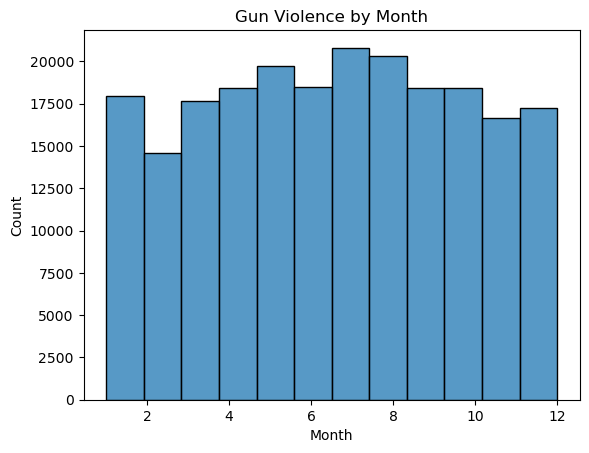

In [42]:
# Look at month and day to determine trends in gun violence  
sns.histplot(Mortality['Month'], bins = 12) 
plt.title('Gun Violence by Month')

#### A higher number of gun violence occurs in the height of summer, July and August. Gun violence drops in November, December and February.

Text(0.5, 1.0, 'Gun Violence by Day of Month')

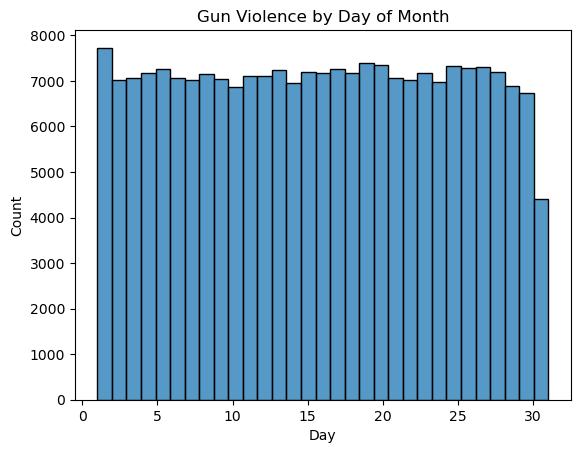

In [43]:
sns.histplot(Mortality['Day'], bins=31)
plt.title('Gun Violence by Day of Month')

#### While there is a steady amount of gun violence most days every month, the first of the month has significantly more incidents. Although the 31st has far fewer incidents, this would be explained by the fact that not all months have 31 days.

#### The increase in violence on the 1st of every month could also have to do with reporting. For places reporting on violence monthly, reports may be generated on the 1st.

In [44]:
Mortality.head()

,State,#_killed,#_injured,latitude,longitude,n_guns_involved,Geographic_Region,Year,Month,Day,State_Year,State Population,Population_millions,Total Victims,Victims_per_100000
0,District of Columbia,0.0,5.0,38.8978,-76.9717,1.0,East,2013,1.0,26.0,"District of Columbia, 2013",617513,0.617513,5.0,53.2572
1,District of Columbia,0.0,13.0,38.9062,-77.0099,4.0,East,2013,3.0,11.0,"District of Columbia, 2013",617513,0.617513,13.0,53.2572
2,District of Columbia,0.0,4.0,38.8583,-76.9883,1.0,East,2013,7.0,13.0,"District of Columbia, 2013",617513,0.617513,4.0,53.2572
3,District of Columbia,1.0,3.0,38.9047,-77.0122,1.0,East,2013,9.0,12.0,"District of Columbia, 2013",617513,0.617513,4.0,53.2572
4,District of Columbia,11.0,3.0,38.8730,-76.9977,2.0,East,2013,9.0,16.0,"District of Columbia, 2013",617513,0.617513,14.0,53.2572


In [45]:
# Use population to create state categories by population 

Mortality.loc[Mortality['State Population'] < 4000000, 'Population Flag'] = 'Low Populated State'
Mortality.loc[(Mortality['State Population'] >= 4000000) & (Mortality['State Population'] < 10000000), 'Population Flag'] = 'Medium Populated State'
Mortality.loc[Mortality['State Population'] >= 10000000, 'Population Flag'] = 'Very Populated State'

In [46]:
Mortality['Population Flag'].value_counts()

Medium Populated State    97023
Very Populated State      83750
Low Populated State       37888
Name: Population Flag, dtype: int64

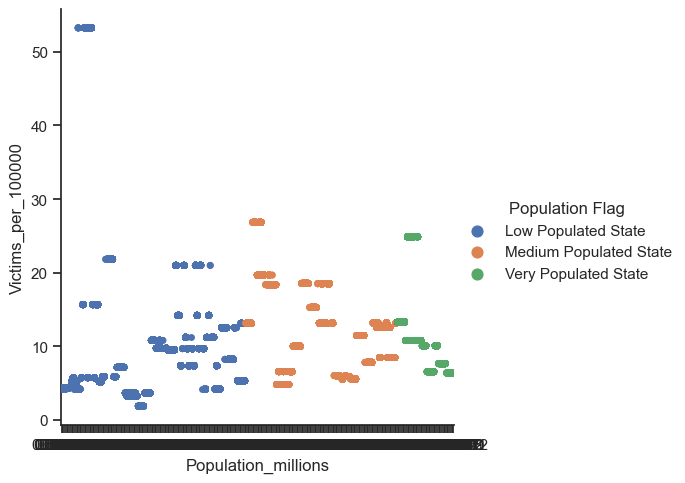

In [47]:
# Create a cat plot based on the state populations above
sns.set(style="ticks")
g = sns.catplot(x="Population_millions", y="Victims_per_100000", hue="Population Flag", data=Mortality)

#### Although the data points are very close together, it appears that the states with the highest number of victims per 100,000 people are low or medium populated states.

In [48]:
# Define political lean of states

liberal_state = ['Washington','Oregon','District of Columbia','California','Colorado','New Mexico','Illinois','Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','New Jersey','Delaware','Maryland','Hawaii','Minnesota','Virginia']

In [49]:
swing_state = ['Nevada','Arizona','Wisconsin','Pennsylvania','North Carolina','Georgia','Michigan']

In [50]:
conservative_state = ['Idaho','Wyoming','Montana','Utah','North Dakota','Ohio','South Dakota','Nebraska','Oklahoma','Kansas','Texas','Iowa','Missouri','Arkansas','Louisiana','Indiana','Kentucky','Tennessee','Alabama','Mississippi','Florida','South Carolina','West Virginia','Alaska']

In [51]:
Mortality.loc[Mortality['State'].isin (liberal_state), 'Politics'] = 'Liberal State'
Mortality.loc[Mortality['State'].isin (swing_state), 'Politics'] = 'Swing State'
Mortality.loc[Mortality['State'].isin (conservative_state), 'Politics'] = 'Conservative State'

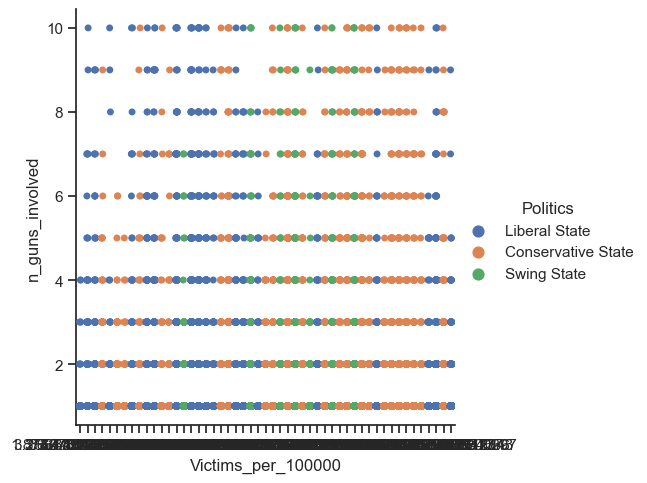

In [52]:
# Create a cat plot based on the state politics
sns.set(style="ticks")
g = sns.catplot(x="Victims_per_100000", y="n_guns_involved", hue="Politics", data=Mortality)

#### It appears that more people are injured and killed in conservative states than liberal states

In [53]:
Mortality['Politics'].value_counts()

Conservative State    97367
Liberal State         83449
Swing State           37845
Name: Politics, dtype: int64

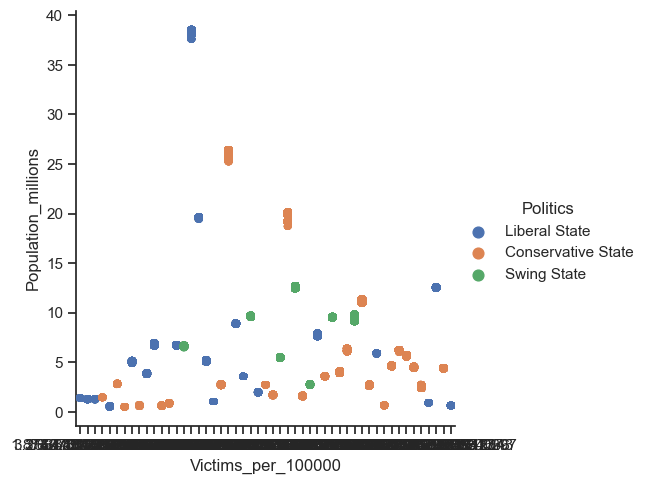

In [54]:
sns.set(style="ticks")
i = sns.catplot(x="Victims_per_100000", y="Population_millions", hue="Politics", data=Mortality)

#### Although some liberal states have a high rate of victims per 100000 people, there is a larger number of conservative states with high rates. 

In [55]:
# Import geographical visualization tools 

import folium 
import json 

country_geo = r'C:\Users\Megan\Documents\Analytics\Gun Violence Achievement 6\02 Data\Raw Data\us-states.json'

In [56]:
# Create subset for first map

plot = Mortality.groupby(['State'], as_index=False, sort=False)['Victims_per_100000'].mean()
print (plot)

                   State  Victims_per_100000
0   District of Columbia           53.257200
1              Louisiana           26.845573
2               Illinois           24.878434
3               Delaware           21.821521
4            Mississippi           20.987509
5                Alabama           19.672460
6               Missouri           18.545331
7              Tennessee           18.511919
8         South Carolina           18.367266
9                 Alaska           15.657844
10              Maryland           15.276741
11              Arkansas           14.188700
12                  Ohio           13.296284
13        North Carolina           13.165535
14               Indiana           13.145740
15              Kentucky           13.123277
16               Georgia           12.560611
17              Oklahoma           12.521028
18              Virginia           11.461827
19                Nevada           11.213740
20         West Virginia           10.797450
21        

In [57]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = plot,
    columns = ['State', 'Victims_per_100000'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlGnBu', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Injured and Killed by Guns per 100,000 People").add_to(map)
folium.LayerControl().add_to(map)

map

#### The states with the highest rate of those killed and injured by gun violence are primarily located in the Southeastern United States, as well as the Great Lakes region. 

In [58]:
# Create subset for second map

plot_1 = Mortality.groupby(['State'], as_index=False, sort=False)['Total Victims'].sum()
print (plot_1)

                   State  Total Victims
0   District of Columbia         1744.0
1              Louisiana         5927.0
2               Illinois        15601.0
3               Delaware         1014.0
4            Mississippi         2742.0
5                Alabama         4443.0
6               Missouri         5253.0
7              Tennessee         5747.0
8         South Carolina         4281.0
9                 Alaska          536.0
10              Maryland         4511.0
11              Arkansas         1916.0
12                  Ohio         7430.0
13        North Carolina         6265.0
14               Indiana         4102.0
15              Kentucky         2641.0
16               Georgia         6011.0
17              Oklahoma         2247.0
18              Virginia         4478.0
19                Nevada         1562.0
20         West Virginia          867.0
21          Pennsylvania         6795.0
22               Florida         9897.0
23             Wisconsin         2736.0


In [59]:
# Create map to show total number people killed by state 

map_1 = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = plot_1,
    columns = ['State', 'Total Victims'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlGnBu', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total Number Killed").add_to(map_1)
folium.LayerControl().add_to(map_1)

map_1

#### The states with the highest total number of those killed and injured generally correspond to states with the largest U.S populations

In [60]:
# Create subset for second map

plot_2 = df.groupby(['State'], as_index=False, sort=False)['Population_millions'].mean()
print (plot_2)

                   State  Population_millions
0           Pennsylvania            12.600217
1             California            38.373945
2                   Ohio            11.176055
3               Colorado             5.184882
4         North Carolina             9.517274
5               Oklahoma             3.589162
6             New Mexico             1.983890
7              Louisiana             4.415626
8               Maryland             5.905710
9              Tennessee             6.208973
10              Missouri             5.665038
11  District of Columbia             0.654935
12              Illinois            12.541786
13              Delaware             0.929358
14                  Utah             2.840842
15              Michigan             9.645859
16               Georgia             9.571191
17               Indiana             6.240805
18           Mississippi             2.612983
19              New York            19.590816
20               Florida          

In [61]:
map_2 = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = plot_2,
    columns = ['State', 'Population_millions'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlGnBu', fill_opacity=0.8, line_opacity=0.1,
    legend_name = "State Population").add_to(map_2)
folium.LayerControl().add_to(map_2)

map_2

#### After comparing all three maps, it is clear that state population doesn't play a huge factor in determining the rate of gun violence victims per 100,000 people. Many of the states in the Southeastern U.S. have a low population but a high rate of violence, while states like California and Texas have large populations by a low rate of victims per 100,000 people. 

#### After look at all the maps, the Western and Northeastern United States appear to be the safest, in regard to the number of people injured or killed by gun violence per 100,000 people 

In [62]:
Mortality.head()

,State,#_killed,#_injured,latitude,longitude,n_guns_involved,Geographic_Region,Year,Month,Day,State_Year,State Population,Population_millions,Total Victims,Victims_per_100000,Population Flag,Politics
0,District of Columbia,0.0,5.0,38.8978,-76.9717,1.0,East,2013,1.0,26.0,"District of Columbia, 2013",617513,0.617513,5.0,53.2572,Low Populated State,Liberal State
1,District of Columbia,0.0,13.0,38.9062,-77.0099,4.0,East,2013,3.0,11.0,"District of Columbia, 2013",617513,0.617513,13.0,53.2572,Low Populated State,Liberal State
2,District of Columbia,0.0,4.0,38.8583,-76.9883,1.0,East,2013,7.0,13.0,"District of Columbia, 2013",617513,0.617513,4.0,53.2572,Low Populated State,Liberal State
3,District of Columbia,1.0,3.0,38.9047,-77.0122,1.0,East,2013,9.0,12.0,"District of Columbia, 2013",617513,0.617513,4.0,53.2572,Low Populated State,Liberal State
4,District of Columbia,11.0,3.0,38.8730,-76.9977,2.0,East,2013,9.0,16.0,"District of Columbia, 2013",617513,0.617513,14.0,53.2572,Low Populated State,Liberal State


In [63]:
# Check for missing values

Mortality.isnull().sum()

State                  0
#_killed               0
#_injured              0
latitude               0
longitude              0
n_guns_involved        0
Geographic_Region      0
Year                   0
Month                  0
Day                    0
State_Year             0
State Population       0
Population_millions    0
Total Victims          0
Victims_per_100000     0
Population Flag        0
Politics               0
dtype: int64

In [64]:
pd.crosstab(Mortality['Population Flag'], Mortality['n_guns_involved'], dropna=False)

n_guns_involved,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Population Flag,,,,,,,,,,
Low Populated State,35853,1281,372,148,80,52,39,23,26,14
Medium Populated State,92767,2679,756,343,148,97,93,55,45,40
Very Populated State,79749,2655,668,279,140,94,69,39,26,31


In [65]:
def season(Mortality): 
    if (Mortality['Month'] > 2) & (Mortality['Month'] <= 5):
        return 'Spring' 
    elif (Mortality['Month'] > 5) & (Mortality['Month'] <= 8):
        return 'Summer' 
    elif (Mortality['Month'] > 8) & (Mortality['Month'] <= 11):
        return 'Autumn'  
    else: return 'Winter'

In [66]:
Mortality['Season'] = Mortality.apply(season, axis=1)

In [67]:
Mortality.head()

,State,#_killed,#_injured,latitude,longitude,n_guns_involved,Geographic_Region,Year,Month,Day,State_Year,State Population,Population_millions,Total Victims,Victims_per_100000,Population Flag,Politics,Season
0,District of Columbia,0.0,5.0,38.8978,-76.9717,1.0,East,2013,1.0,26.0,"District of Columbia, 2013",617513,0.617513,5.0,53.2572,Low Populated State,Liberal State,Winter
1,District of Columbia,0.0,13.0,38.9062,-77.0099,4.0,East,2013,3.0,11.0,"District of Columbia, 2013",617513,0.617513,13.0,53.2572,Low Populated State,Liberal State,Spring
2,District of Columbia,0.0,4.0,38.8583,-76.9883,1.0,East,2013,7.0,13.0,"District of Columbia, 2013",617513,0.617513,4.0,53.2572,Low Populated State,Liberal State,Summer
3,District of Columbia,1.0,3.0,38.9047,-77.0122,1.0,East,2013,9.0,12.0,"District of Columbia, 2013",617513,0.617513,4.0,53.2572,Low Populated State,Liberal State,Autumn
4,District of Columbia,11.0,3.0,38.8730,-76.9977,2.0,East,2013,9.0,16.0,"District of Columbia, 2013",617513,0.617513,14.0,53.2572,Low Populated State,Liberal State,Autumn


In [68]:
Mortality['Season'].value_counts()

Summer    59625
Spring    55815
Autumn    53466
Winter    49755
Name: Season, dtype: int64

In [69]:
# Export df 

Mortality.to_csv(os.path.join(path, '02 Data','Prepared Data','final_gun_data.csv'))